In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TUXML_CSV_FILENAME="./config_bdd.csv"

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s))
    print("t:", len(t), "  s:", len(s))

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
        # categorical variable
        #if tuxdata[col].dtype == 'object':
        #    try:
        #        tuxdata[col] = tuxdata[col].astype('category')
        #    except:
        #        print('Column', ' ', col, ' cannot be converted to category.')
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
rawtuxdata.drop(columns=ftuniques,inplace=True)

print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))

print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



t: 12798   s: 12798


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1150,2722,6015,6026,6717,7350,7676,7726,8507,9949,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (25542, 12798)
Number of options with only one value (eg always y): (3129, 1)
Non tri-state value options (eg string or integer or hybrid values): (173, 1) 
Predictor variables: 9496


In [2]:
rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE']]

,cid,CC_OPTIMIZE_FOR_SIZE
5783,56589,y
5784,56590,y
5785,56591,y
19798,70713,y
19802,70717,y
19811,70730,y
19812,70731,y


In [3]:
rawtuxdata[rawtuxdata['vmlinux'] == -1]

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
15,50525,2018-06-15 03:53:45,312.314,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,y,n,y,n,y,n
32,50542,2018-06-15 03:56:16,468.914,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,y,n,n,y,n,m,n
69,50579,2018-06-15 04:00:35,468.916,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,y,n,n,n,n,n
72,50582,2018-06-15 04:01:04,343.571,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,n,n,m,y,n,n,n
76,50586,2018-06-15 04:01:22,558.079,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,n,n,n,m,n,m,y
86,50596,2018-06-15 04:02:50,275.115,-1,-1,-1,-1,-1,-1,-1,...,y,n,y,y,n,n,y,y,n,n
103,50613,2018-06-15 04:04:29,284.565,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,y,n,n,y,n,m,n
126,50636,2018-06-15 04:07:46,333.128,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,y,n,n,n
145,50655,2018-06-15 04:10:35,509.338,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,y,n,y,n
168,50678,2018-06-15 04:12:55,415.854,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,y,n,n,n


In [4]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0      28236896
1      35342744
2      34624152
3      38339072
4      41650560
5      25481312
6      50641216
7     149856048
8     100119848
9     132791616
10     36001168
11     52191240
12     20233544
13     40490904
14     51638552
15           -1
16     24340416
17     20962704
18    142159824
19    122013008
Name: vmlinux, dtype: int64

In [5]:
rawtuxdata.shape, rawtuxdata[rawtuxdata['vmlinux'] != -1].shape, 

((25542, 9669), (23893, 9669))

In [6]:
from sklearn.preprocessing import *

compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    tuxdata_for_compilation[compilation_status_column_name] = rawtuxdata['vmlinux'] != -1
    return tuxdata_for_compilation

tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
tuxdata_for_compilation [compilation_status_column_name].describe()

count     25542
unique        2
top        True
freq      23893
Name: compile_success, dtype: object

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


TESTING_SIZE=0.3 


X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
clf = GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]    

TOP_FT_IMPORTANCE=20
print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
for f in range(TOP_FT_IMPORTANCE): # len(indices)
    print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))

acc = accuracy_score (y_test, y_pred)
prec = precision_score (y_test, y_pred)
reca = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)
print("Accuracy score: %.2f" % (acc))
print("Precision score: %.2f" % (prec))
print("Recall score: %.2f" % (reca))
print("F1 score: %.2f" % (f1))

Feature ranking: top (20)
1. feature AIC79XX_BUILD_FIRMWARE 1981 (0.176049)
2. feature DRM_VBOXVIDEO 6047 (0.163664)
3. feature AIC7XXX_BUILD_FIRMWARE 1401 (0.141345)
4. feature WANXL_BUILD_FIRMWARE 7962 (0.084405)
5. feature DEBUG_INFO 4306 (0.042338)
6. feature EMBEDDED 6693 (0.038463)
7. feature GENERIC_ALLOCATOR 8976 (0.034226)
8. feature CRC32 2051 (0.032598)
9. feature UBSAN_SANITIZE_ALL 2111 (0.031927)
10. feature INFINIBAND_ADDR_TRANS 4775 (0.016295)
11. feature NEW_LEDS 7054 (0.011285)
12. feature INFINIBAND_HFI1 7783 (0.008281)
13. feature SDMA_VERBOSITY 7809 (0.008230)
14. feature INFINIBAND_QIB 6837 (0.007826)
15. feature TRACING_SUPPORT 8724 (0.007041)
16. feature SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH 9467 (0.006970)
17. feature XEN_ACPI_PROCESSOR 1823 (0.006870)
18. feature SND_SOC_INTEL_BYT_CHT_ES8316_MACH 9397 (0.006664)
19. feature SND_CA0106 6964 (0.006445)
20. feature XEN_BLKDEV_FRONTEND 3803 (0.006101)
Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00


In [8]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
#TODO: seems not working 
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
n_failures = len(rawtuxdata[rawtuxdata['vmlinux'] == -1]) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
print(str(n_failures) + " failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")



#tuxdata["vmlinux"]
#tuxdata.where(tuxdata["vmlinux"] == np.NaN)

#tuxdata[tuxdata["vmlinux"] != -1]
#tuxdata
#tuxdata[tuxdata['vmlinux'] != -1].shape

25542 before the removal of some entries (those with same configurations)
25542 after the removal of some entries (those with same configurations)
1649 failures out of 25542
23893 after the removal of configurations that do NOT compile


In [10]:
print("some configurations have X86_32 (coz we have tested/tried some options and there are in the database)", rawtuxdata['X86_64'].describe())
# we only keep X86_64 configurations
rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y']

some configurations have X86_32 (coz we have tested/tried some options and there are in the database) count     23893
unique        2
top           y
freq      23885
Name: X86_64, dtype: object


<Figure size 432x288 with 0 Axes>

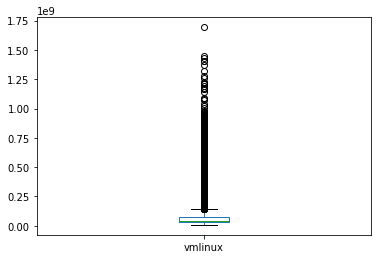

<Figure size 432x288 with 0 Axes>

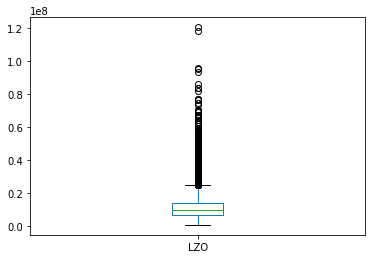

<Figure size 432x288 with 0 Axes>

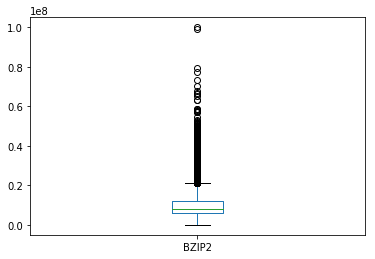

count    2.388500e+04
mean     7.080661e+07
std      9.410106e+07
min      7.317008e+06
25%      2.865133e+07
50%      4.317612e+07
75%      7.290706e+07
max      1.693674e+09
Name: vmlinux, dtype: float64

In [11]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show()

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show()

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show()


rawtuxdata['vmlinux'].describe()


In [12]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

#(rawtuxdata["XZ-vmlinux"] - rawtuxdata["BZIP2-vmlinux"]).plot.box()
# n_size_methods = len(size_methods)
#corr_sizes = [[0 for x in range(n_size_methods)] for y in range(n_size_methods)]
#i = 0
#j = 0
#for size_method in size_methods:
#    csize = rawtuxdata[size_method]   
#    for osize_method in size_methods:
#        if size_method != osize_method:
#            osize = rawtuxdata[osize_method]           
#            pcorr = scipy.stats.pearsonr(csize, osize)[0]
#            corr_sizes[i][j] = pcorr
#        j = j + 1
#    i = i + 1

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,2.88757,25.1306,39.3444,-10.3399,-16.4905
BZIP2o,-2.72035,0,21.7282,35.5108,-12.8238,-18.8245
LZMAo,-20.011,-17.7027,0,11.3674,-28.2474,-33.1531
XZo,-35077.8,-35075.8,-35059.8,0,-35.3373,-39.7588
LZOo,-66941.7,-66938.5,-66913.5,55.5893,0,-6.88938
LZ4o,-73091.5,-73088.2,-73061.3,67.2355,7.41836,0


In [13]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-31.2392,24.7073,38.2956,-10.0064,-16.192
BZIP2o,49.7965,0,86.2054,106.091,34.9074,25.6862
LZMAo,-19.738,-44.9843,0,10.9011,-27.7324,-32.6838
XZo,-27.3626,-50.2897,-9.49852,0,-34.607,-39.088
LZOo,11.2008,-23.4794,38.755,53.8503,0,-6.90227
LZ4o,19.5057,-17.7272,49.1607,65.3845,7.43229,0


In [14]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-26.31,19.0534,28.7648,-8.19118,-13.4124
BZIP2o,37.5884,0,63.177,76.1827,26.4828,19.3863
LZMAo,-15.8784,-38.2459,0,8.12478,-22.7138,-27.0808
XZo,-22.0022,-42.8362,-7.30966,0,-28.3349,-32.3786
LZOo,8.99681,-19.5752,29.8676,40.4685,0,-5.71798
LZ4o,15.6708,-14.5797,37.882,49.1477,6.08517,0


In [15]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.477839,0.477865,0.476017,0.492074,0.49202,0.490508,0.467069,0.467105,0.464618,0.471585,0.471623,0.470308,0.492966,0.493336,0.492636,0.498627,0.499025,0.49842
GZIP-bzImage,0.477839,1,1,0.999827,0.996988,0.996582,0.997015,0.997712,0.997714,0.997483,0.993856,0.993857,0.993794,0.996959,0.997001,0.997138,0.993787,0.993834,0.994012
GZIP-vmlinux,0.477865,1,1,0.999826,0.996993,0.996588,0.99702,0.997711,0.997712,0.997481,0.993855,0.993856,0.993793,0.996964,0.997006,0.997142,0.993794,0.993841,0.994019
GZIP,0.476017,0.999827,0.999826,1,0.996693,0.996286,0.996999,0.997475,0.997475,0.997711,0.993811,0.993811,0.99378,0.996806,0.996725,0.99688,0.993574,0.993486,0.993682
BZIP2-bzImage,0.492074,0.996988,0.996993,0.996693,1,0.999601,0.999887,0.993727,0.993736,0.993333,0.991167,0.991176,0.990831,0.998306,0.998327,0.998296,0.997232,0.997254,0.997281
BZIP2-vmlinux,0.49202,0.996582,0.996588,0.996286,0.999601,1,0.999487,0.993324,0.993333,0.992929,0.990759,0.990767,0.990422,0.997914,0.997935,0.997903,0.996845,0.996868,0.996894
BZIP2,0.490508,0.997015,0.99702,0.996999,0.999887,0.999487,1,0.993712,0.99372,0.993693,0.991301,0.991309,0.990996,0.998311,0.998235,0.998222,0.997172,0.997089,0.997133
LZMA-bzImage,0.467069,0.997712,0.997711,0.997475,0.993727,0.993324,0.993712,1,1,0.999687,0.994099,0.994098,0.994091,0.990909,0.990988,0.991156,0.986091,0.986178,0.986383
LZMA-vmlinux,0.467105,0.997714,0.997712,0.997475,0.993736,0.993333,0.99372,1,1,0.999685,0.9941,0.994099,0.994091,0.990917,0.990997,0.991163,0.986102,0.986189,0.986393
LZMA,0.464618,0.997483,0.997481,0.997711,0.993333,0.992929,0.993693,0.999687,0.999685,1,0.994044,0.994042,0.994078,0.990705,0.990619,0.990811,0.985804,0.985711,0.985939


In [16]:
#from category_encoders import *
from sklearn.preprocessing import *

#X = [['y', 1], ['n', 3], ['m', 2]]
#enc.fit(X)
#enc.transform(tuxdata)

#enc = OrdinalEncoder().fit(tuxdata[:10])

# transform the dataset
#enc.transform(tuxdata[:10])

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#print(non_tristate_options)

# we save quantitative values we want (here vmlinux, TODO: generalize)
# the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
# vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
tuxdata[size_methods] = vml
# tuxdata['vmlinux'].astype('int64')

# example: DEBUG_INFO is either y or n
tuxdata['DEBUG_INFO'].unique()

array([0, 1])

In [ ]:
#print ("Warning, we only focus on configurations without DEBUG_INFO ")
#tuxdata = tuxdata[tuxdata['DEBUG_INFO'] == le.transform(['n'])[0]]

In [ ]:
# tuxdata.where(not np.isnan(tuxdata["vmlinux"]))
#tuxdata["vmlinux"][16] == np.isnan
#vml == -1 
#tuxdata["vmlinux"] == -1
#tuxdata['vmlinux'].dtypes
#vml.dtypes
#tuxdata['vmlinux'].dtypes #.astype('int64')
#TODO: remove configurations like this 

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm


TESTING_SIZE=0.3 

# drop(columns=["date", "time", "vmlinux", "cid"])
# tuxdata.drop(columns=non_tristate_options)

linearRegression=False
size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 

X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_of_interest], test_size=TESTING_SIZE, random_state=0)  
# multi output
#X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

# train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

#clf = RandomForestRegressor(n_estimators=100) 

if linearRegression:
    regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
else:
    clf = GradientBoostingRegressor(n_estimators=100) # RandomForestRegressor(n_estimators=100) #   
    # 
    #clf = Pipeline([
    #  ('feature_selection', SelectFromModel(LassoCV(tol = 0.001))),
    #  ('regression', GradientBoostingRegressor(n_estimators=100))
    # ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=100
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
#plt.figure()
#plt.title("Feature importances for size of vmlinux")
#plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
#plt.xticks(range(tuxdata.shape[1]), indices)
#plt.xlim([-1, tuxdata.shape[1]])
#plt.show()
mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 
print("Prediction score (MAE): %.2f" % (mae))
print("Prediction score (MSE): %.2f" % (mse))
print("Prediction score (R2): %.2f" % (r2))


Feature ranking: top (100)
1. feature DEBUG_INFO 4306 (0.201873)
2. feature DEBUG_INFO_REDUCED 5446 (0.098669)
3. feature DEBUG_INFO_SPLIT 5463 (0.090524)
4. feature RANDOMIZE_BASE 4443 (0.055996)
5. feature X86_NEED_RELOCS 4448 (0.054202)
6. feature UBSAN_SANITIZE_ALL 2111 (0.051124)
7. feature GCOV_PROFILE_ALL 9440 (0.021701)
8. feature DEBUG_INFO_DWARF4 5479 (0.014356)
9. feature KASAN 503 (0.013362)
10. feature UBSAN_ALIGNMENT 2117 (0.013030)
11. feature STRICT_MODULE_RWX 9410 (0.012255)
12. feature ISCSI_TARGET_CXGB4 2627 (0.011644)
13. feature DRM_AMDGPU 2921 (0.011306)
14. feature BT_HCIBT3C 6699 (0.010612)
15. feature KASAN_OUTLINE 5981 (0.010429)
16. feature MODULES 5351 (0.007793)
17. feature INFINIBAND_ISERT 7453 (0.007607)
18. feature XFS_DEBUG 4511 (0.007563)
19. feature BLK_DEV_FD 1512 (0.006785)
20. feature MDIO_THUNDER 1386 (0.006162)
21. feature DRM_BOCHS 6607 (0.006004)
22. feature KCOV_INSTRUMENT_ALL 6524 (0.005836)
23. feature SCSI_ISCSI_ATTRS 244 (0.005699)
24. fea

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
tuxdata_reduced = model.transform(tuxdata.drop(columns=size_methods))
tuxdata_reduced.shape, tuxdata.shape


((23885, 181), (23885, 9496))

In [ ]:
#lass = SelectFromModel(LassoCV(tol = 0.001))
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape 

In [ ]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

In [ ]:
# tuxdata.where(tuxdata["vmlinux"] != -1).sort_values(by='vmlinux')[:5] # & 

In [ ]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [ ]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [ ]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [ ]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)